In [2]:
#Setup#
import nsfg
import thinkplot
import thinkstats2
import matplotlib.pyplot as plt
import thinkstats2
hist = thinkstats2.Hist([1, 2, 2, 3, 5]) 
preg = nsfg.ReadFemPreg() 
live = preg[preg.outcome == 1] 
print(live)

       caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0           1         1        NaN        NaN       NaN       NaN       6.0   
1           1         2        NaN        NaN       NaN       NaN       6.0   
2           2         1        NaN        NaN       NaN       NaN       5.0   
3           2         2        NaN        NaN       NaN       NaN       6.0   
4           2         3        NaN        NaN       NaN       NaN       6.0   
...       ...       ...        ...        ...       ...       ...       ...   
13581   12568         2        NaN        NaN       NaN       NaN       5.0   
13584   12569         2        NaN        NaN       NaN       NaN       6.0   
13588   12571         1        NaN        NaN       NaN       NaN       6.0   
13591   12571         4        NaN        NaN       NaN       NaN       6.0   
13592   12571         5        NaN        NaN       NaN       NaN       6.0   

       pregend2  nbrnaliv  multbrth  ...  laborfor_

In [3]:
#Loads data to compare first and others#
firsts = live[live.birthord == 1] 
others = live[live.birthord != 1] 
print(firsts)

       caseid  pregordr  howpreg_n  howpreg_p  moscurrp  nowprgdk  pregend1  \
0           1         1        NaN        NaN       NaN       NaN       6.0   
2           2         1        NaN        NaN       NaN       NaN       5.0   
5           6         1        NaN        NaN       NaN       NaN       6.0   
8           7         1        NaN        NaN       NaN       NaN       5.0   
10         12         1        NaN        NaN       NaN       NaN       5.0   
...       ...       ...        ...        ...       ...       ...       ...   
13576   12565         1        NaN        NaN       NaN       NaN       6.0   
13578   12566         1        NaN        NaN       NaN       NaN       6.0   
13581   12568         2        NaN        NaN       NaN       NaN       5.0   
13584   12569         2        NaN        NaN       NaN       NaN       6.0   
13588   12571         1        NaN        NaN       NaN       NaN       6.0   

       pregend2  nbrnaliv  multbrth  ...  laborfor_

In [4]:
#Loads data for weights#

firstweights= firsts.totalwgt_lb
print(firstweights)

othersweights= others.totalwgt_lb
print(othersweights)

0        8.8125
2        9.1250
5        8.5625
8        7.5625
10       7.8125
          ...  
13576    6.4375
13578    6.0000
13581    6.3750
13584    6.3750
13588    6.1875
Name: totalwgt_lb, Length: 4413, dtype: float64
1        7.8750
3        7.0000
4        6.1875
6        9.5625
7        8.3750
          ...  
13572    5.8125
13574    6.1250
13579    7.0000
13591    7.5000
13592    7.5000
Name: totalwgt_lb, Length: 4735, dtype: float64


In [5]:
#Below will print statistical signifant factors for both first born and others weights#
print(firstweights.mean())
print(firstweights.std())
print(firstweights.var())

7.201094430437772
1.4205728777207374
2.0180273009157768


In [6]:
print(othersweights.mean())
print(othersweights.std())
print(othersweights.var())

7.325855614973262
1.3941954762143138
1.9437810258964572


In [7]:
firstweights.describe()

count    4363.000000
mean        7.201094
std         1.420573
min         0.125000
25%         6.437500
50%         7.312500
75%         8.000000
max        15.437500
Name: totalwgt_lb, dtype: float64

In [8]:
othersweights.describe()

count    4675.000000
mean        7.325856
std         1.394195
min         0.562500
25%         6.500000
50%         7.375000
75%         8.187500
max        14.000000
Name: totalwgt_lb, dtype: float64

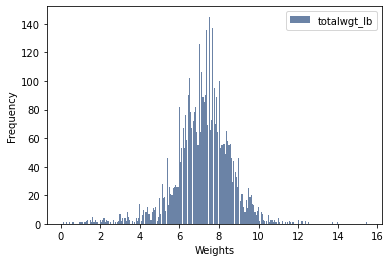

<Figure size 576x432 with 0 Axes>

In [7]:
#Below shows histogram breakdown of first born child weights#
firstwhis= thinkstats2.Hist(firsts.totalwgt_lb, label= 'totalwgt_lb')
thinkplot.Hist(firstwhis)
thinkplot.show(xlabel= 'Weights', ylabel = 'Frequency')

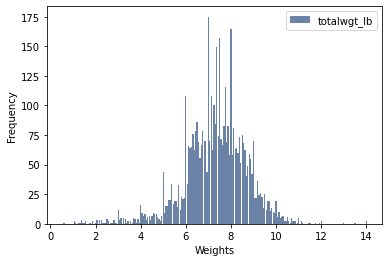

<Figure size 576x432 with 0 Axes>

In [8]:
#Below shows a histogram showing the distribution of after 1st born child#
otherwhis= thinkstats2.Hist(others.totalwgt_lb, label= 'totalwgt_lb')
thinkplot.Hist(otherwhis)
thinkplot.show(xlabel= 'Weights', ylabel = 'Frequency')

In [11]:
#The following will run cohen to show if there is a difference between the weight sets#
cohenmean= print(firstweights.mean()- othersweights.mean())
print(cohenmean)

-0.12476118453549034
None


In [30]:
n1=len(firstweights)
n1

4413

In [31]:
n2=len(othersweights)
n2

4735

In [33]:
num= (n1+n2)
num

9148

In [36]:
firstwvar= firstweights.var()
otherwvar= othersweights.var()
print(firstwvar,otherwvar)

2.0180273009157768 1.9437810258964572


In [39]:
polledvar = ((n1* firstwvar) + (n2 * otherwvar))
polledvar

18109.35763656105

In [41]:
polled_var = polledvar/num
polled_var

1.979597467923158

In [42]:
import math
squ = (math.sqrt(polled_var))
squ

1.4069816871314134

In [43]:
COHEN= polled_var/squ
COHEN

1.4069816871314131

In [ ]:
#Fun comparison#
print(firstweights.max())
print(firstweights.min())
print(othersweights.max())
print(othersweights.min())